<a href="https://colab.research.google.com/github/lamnguyenkhang31231021496/ueh25_ktltsp_khanglam_st3/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phân loại loài hoa Iris**

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
image1 = Image.open("Iris_setosa.jpg"); image2 = Image.open("Iris_versicolor.jpg"); image3 = Image.open("Iris_virginica.jpg");

# **1. Định nghĩa vấn đề (Define Problem)**

**- Mô tả:**
  - Bộ dữ liệu bao gồm 50 mẫu từ mỗi loài hoa trong số ba loài Iris (Iris setosa, Iris virginica và Iris versicolor).
  - Bốn đặc điểm được đo từ mỗi mẫu: chiều dài và chiều rộng của các lá đài (sepal) và cánh hoa (petal), tính bằng cm.

**- Dữ liệu vào:**
  - sepal length (cm)
  - sepal width (cm)
  - petal length (cm)
  - petal width (cm)

**- Kết quả:** class (Iris Setosa, Iris Versicolor, Iris Virginica)

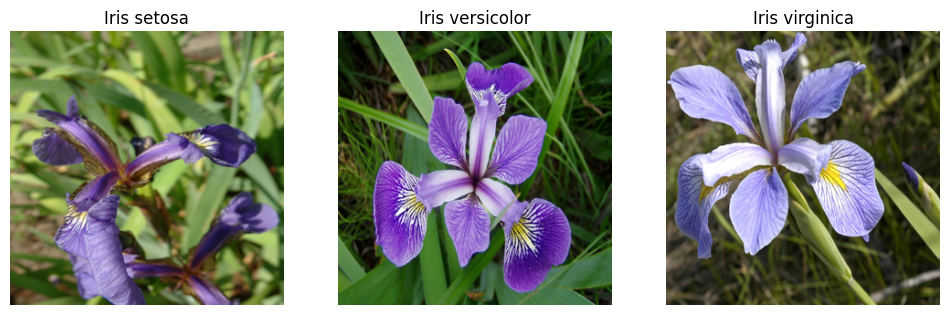

In [6]:
plt.figure(figsize=(12,12));
plt.subplot(1,3,1), plt.imshow(image1.resize((300,300))), plt.axis("off"), plt.title("Iris setosa");
plt.subplot(1,3,2), plt.imshow(image2.resize((300,300))), plt.axis("off"), plt.title("Iris versicolor");
plt.subplot(1,3,3), plt.imshow(image3.resize((300,300))), plt.axis("off"), plt.title("Iris virginica");
plt.show()

# **2. Chuẩn bị vấn đề (Prepare Problem)**

**2.1. Khai báo thư viện (Load Libraries)**

In [8]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

**2.2 Nạp dữ liệu (Load Dataset)**

In [14]:
# Load dataset
data_path  = "/content/iris.csv"
data_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
df_dataset = pd.read_csv(data_path, names = data_names)

# **3. Phân tích dữ liệu (Analyze Data)**

## **3.1. Thống kê mô tả (Descriptive Statistics)**

**(1) Hiển thị một số thông tin về dữ liệu**

- Số dòng, số cột của dữ liệu
- Kiểu dữ liệu của từng cột
- 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
- Thông tin chung về dữ liệu

In [15]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
print(f'+First 5 Rows: \n{df_dataset.head()}')
print(f'+Last 5 Rows: \n{df_dataset.tail()}')

+ Shape: (150, 5)
+Data Types: 
sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object
+ Contents: 
+First 5 Rows: 
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
+Last 5 Rows: 
     sepal-length  sepal-width  petal-length  petal-width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149   

**Nhận xét:**

- Dữ liệu có 4 tính chất để phân lớp: sepal-length, sepal-width, petal-length, petal-width
- Giá trị 4 tính chất được tính cùng đơn vị đo (cm)
- Tổng số dòng dữ liệu là 150 dòng
- Dữ liệu để phân lớp ở cột class

**(2) Kiểm tra tính toàn vẹn của dữ liệu**

- Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm
- Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng vi phạm
- Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng vi phạm


In [16]:
has_null = df_dataset.isnull().sum().any()
has_nan = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f' + Có giá trị Null: {has_null}')
if has_null:
  display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f' + Có giá trị NaN: {has_nan}')
if has_nan:
  display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f' + Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
    s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
    display.display(df_dataset.query(s_query1))
    display.display(df_dataset.query(s_query2))
    display.display(df_dataset[df_dataset.duplicated()])


Tính toàn vẹn dữ liệu:
 + Có giá trị Null: False
 + Có giá trị NaN: False
 + Số dòng trùng: 3


,sepal-length,sepal-width,petal-length,petal-width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


,sepal-length,sepal-width,petal-length,petal-width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


**Nhận xét:**

- Dữ liệu có 3 dòng bị trùng là dòng ở vị trí 34, 37, 142
- Dữ liệu không có giá trị rỗng (NaN, Null)

**(3) Các tính chất thống kê trên dữ liệu số**
- Count, Mean, Standard Deviation, Minimum Value
- 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [17]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
sepal-length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal-width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal-length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal-width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


**Nhận xét:**
- 4 tính chất có cùng đơn vị đo (cm) nằm trong khoảng [0, 8]

**(4) Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**
Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [18]:
df_dataset["class"].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**Nhận xét:**
- Dữ liệu cần phân loại 3 loài hoa Iris là Iris-virginica, Iris-setosa, và Iris-versicolor
- Các lớp là cân bằng nhau và có số lượng 50

(5) Mối tương quan giữa các tính chất (Correlations)
Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả.

 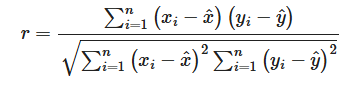

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn.

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

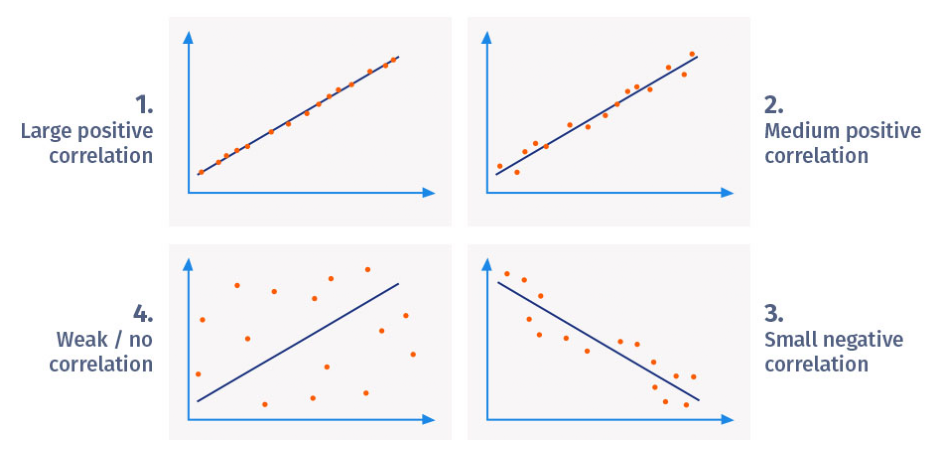

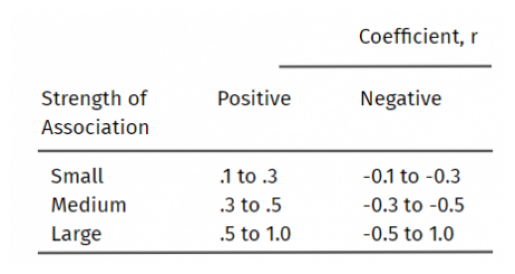

In [19]:
plt.figure(figsize=(12, 6));
plt.imshow(plt.imread("corr1.png")), plt.axis("off"), plt.show();
plt.imshow(plt.imread("corr2.png")), plt.axis("off"), plt.show();

In [22]:
correlations = df_dataset.drop('class', axis=1).corr(method='pearson')
display.display(correlations)

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


**Nhận xét:**

Các cặp tính chất có độ tương đồng cao:
(sepal-length, petal-length) = 0.872
(sepal-length, petal-width) = 0.818
(petal-length, petal-width) = 0.963
# **3.2. Hiển thị dữ liệu (Visualize Data)**
(1) Hiển thị trên từng tính chất đơn (Univariate Plots)
Box and whisker plots **văn bản in đậm** **văn bản in đậm**

https://www.simplypsychology.org/boxplots.html
So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

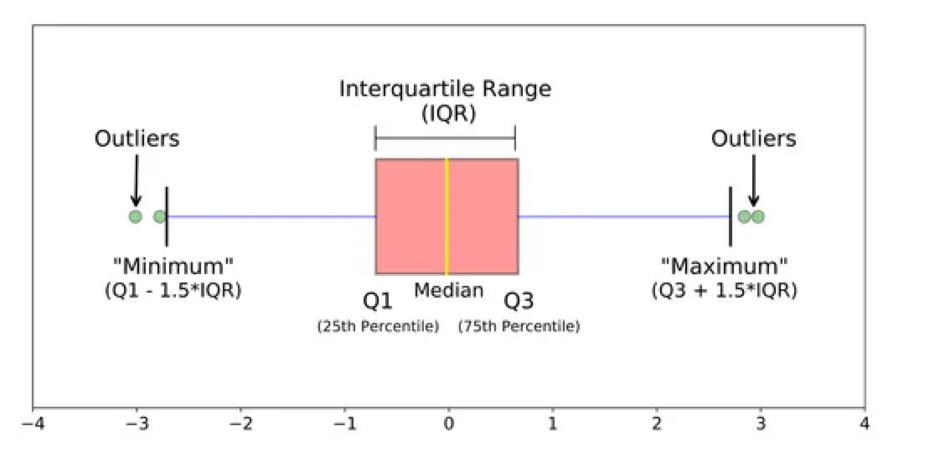

In [23]:
plt.figure(figsize=(12, 6)), plt.imshow(plt.imread("boxplots.png")), plt.axis("off"), plt.show();

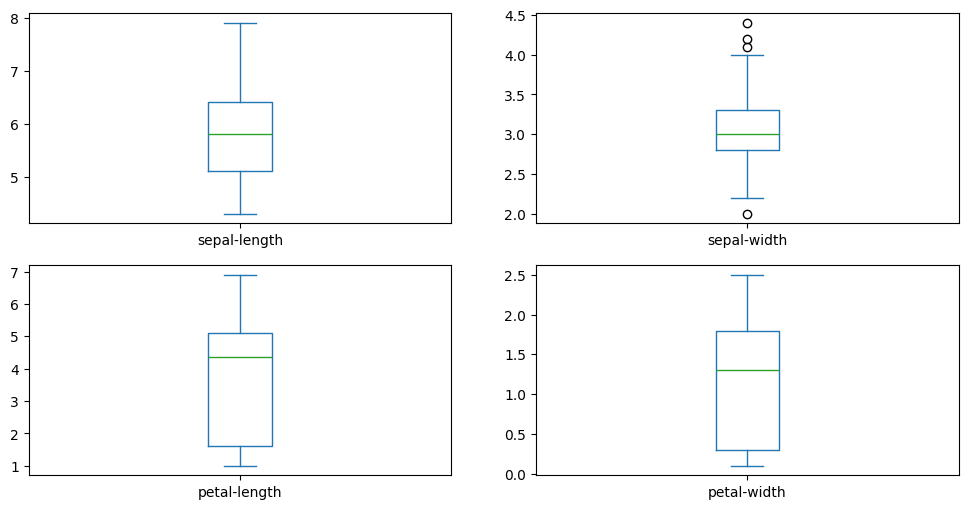

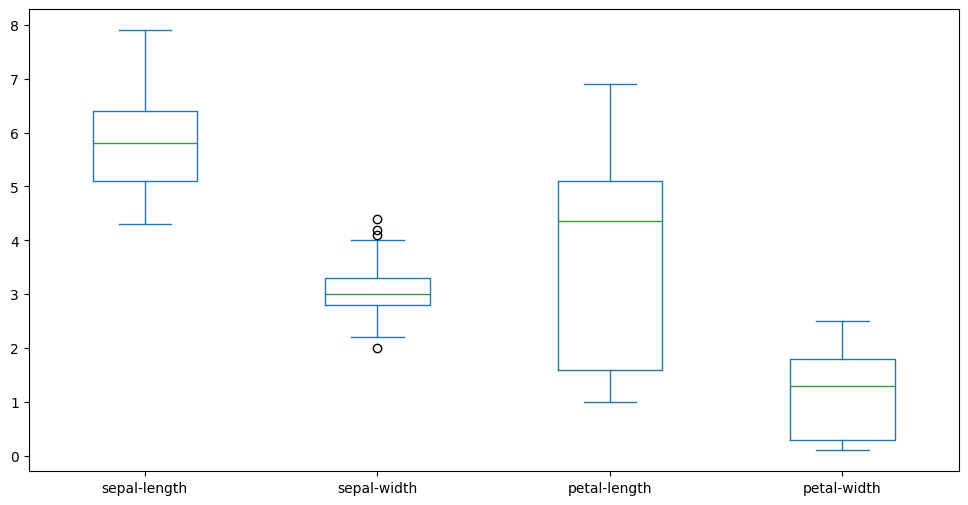

In [24]:
df_dataset.plot(kind="box", subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(12,6));
df_dataset.plot(kind="box", figsize=(12,6));

**Nhận xét:**

Độ trải rộng giữa các tính chất khá khác nhau (sepal-width, sepal-length, petal-width, petal-length)
Độ lệch của sepal-length, petal-length, petal-width theo hướng giá trị nhỏ.
Phân bố giá trị của sepal-width khá cân bằng

**Biểu đồ Histogram**

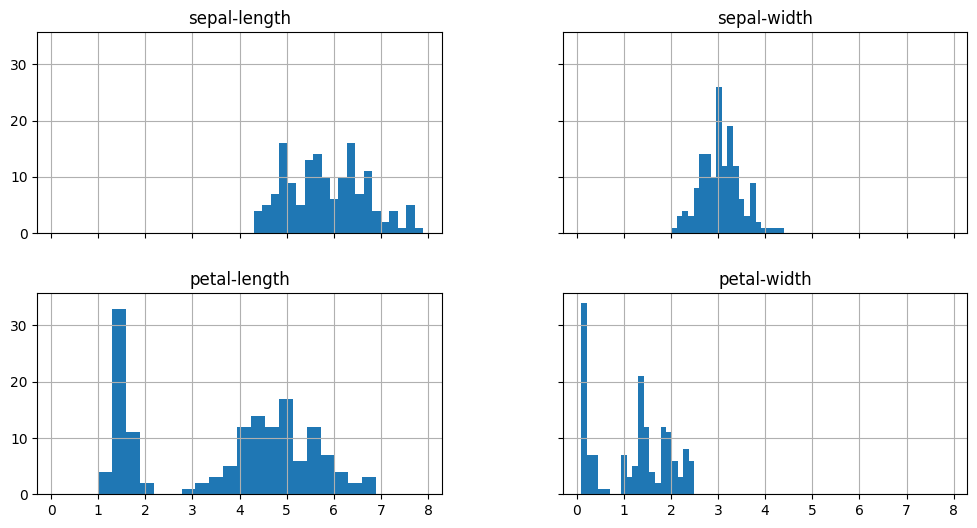

In [25]:
df_dataset.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);


**(2) Hiển thị nhiều tính chất (Multivariate Plots)**

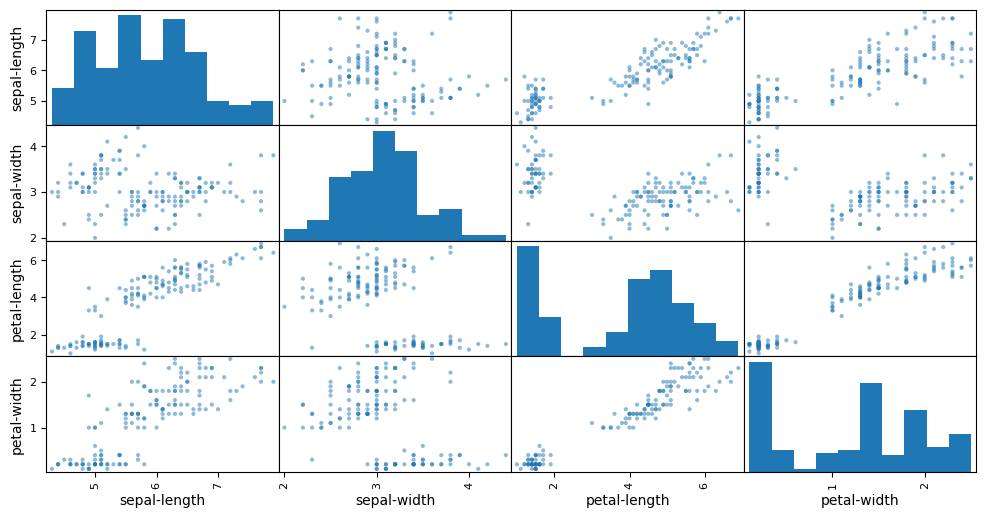

In [26]:

pd.plotting.scatter_matrix(df_dataset, figsize=(12,6));

Các cặp tính chất có độ tương đồng cao:
(sepal-length, petal-length) = 0.872
(sepal-length, petal-width) = 0.818
(petal-length, petal-width) = 0.963

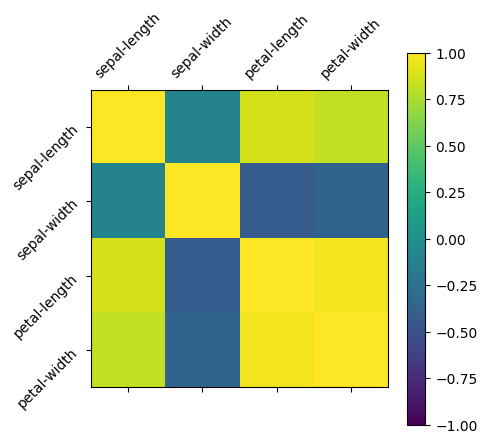

In [27]:

plt.matshow(correlations,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,4), rotation = 45);
plt.yticks(np.arange(0,4), rotation = 45);
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]));
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]));

# **4. Chuẩn bị dữ liệu (Prepare Data)**
## **4.1. Làm sạch dữ liệu (Data Cleaning)**
**(1) Tạo bảng dữ liệu làm sạch**

Chỉ giữ lại các cột Input, Ouput

In [28]:
df_clean = df_dataset.copy()

## **(2) Xóa dữ liệu trùng nhau**


In [29]:
display.display(df_dataset[df_dataset.duplicated()])

,sepal-length,sepal-width,petal-length,petal-width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [30]:
s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
display.display(df_dataset.query(s_query1))
display.display(df_dataset.query(s_query2))

,sepal-length,sepal-width,petal-length,petal-width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [31]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


## **(3) Xử lý giá trị rỗng, không hợp lệ**


In [33]:
has_null = df_dataset.isnull().sum().any()
has_nan = df_dataset.isna().sum().any()
print(f'+ Có giá trị NaN: {has_nan}')
if has_null:
  display.display(df_dataset[df_dataset.isnull().any(axis=1)])

print(f'+ Có giá trị NaN: {has_nan}')
if has_nan:
  display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị NaN: False
+ Có giá trị NaN: False


**Example**
Nếu có dữ liệu Null, hay NaN thì chúng ta có các cách giải quyết sau:
- Chúng ta xóa bỏ cột tính chất vi phạm:
df_clean.drop("cột_vi_phạm", axis=1)
- Chúng ta xóa bỏ các dòng vi phạm:
df_clean.dropna(subset=["cột_vi_phạm", ...])
- Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)

In [34]:
# Example:
df_example = pd.read_csv("data/Data.csv")
df_example

FileNotFoundError: [Errno 2] No such file or directory: 'data/Data.csv'